In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORTING DATA


In [2]:
crop=pd.read_csv('Crop_recommendation.csv')
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
crop.shape

(2200, 8)

In [4]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
crop.duplicated().sum()

0

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# EXPLORING DATA


In [8]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['label_num'] = crop['label'].map(crop_dict)

In [10]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [11]:
crop=crop.drop('label',axis=1)

In [12]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


# CORRELATION OF DATA

In [13]:
corr=crop.corr()

In [14]:
corr

,N,P,K,temperature,humidity,ph,rainfall,label_num
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.317076
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.109993
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.089209
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.031383
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.640925
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.057527
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.311053
label_num,-0.317076,0.109993,-0.089209,-0.031383,-0.640925,0.057527,-0.311053,1.000000


<Axes: >

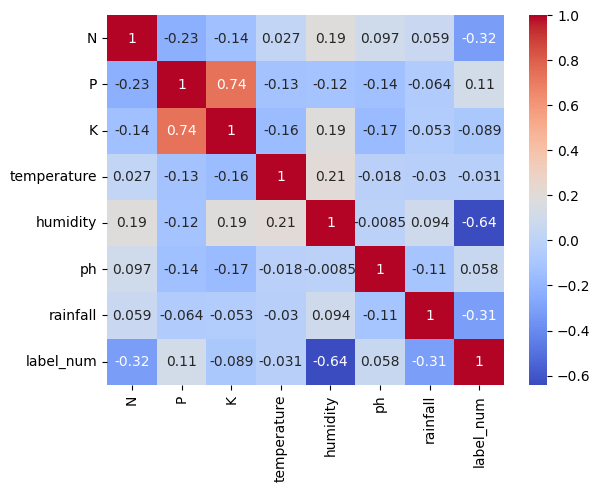

In [15]:
sns.heatmap(corr,annot=True,cmap='coolwarm',cbar=True,fmt='.2g')

# train test split

In [21]:
from sklearn.model_selection import train_test_split
X = crop.iloc[:, :-1]
y = crop.iloc[:, -1]

In [22]:
Xtrain,Xtest,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
Xtrain,Xtest,y_train,y_test

(        N    P    K  temperature   humidity        ph    rainfall
 1656   17   16   14    16.396243  92.181519  6.625539  102.944161
 752    37   79   19    27.543848  69.347863  7.143943   69.408782
 892     7   73   25    27.521856  63.132153  7.288057   45.208411
 1041  101   70   48    25.360592  75.031933  6.012697  116.553145
 1179    0   17   30    35.474783  47.972305  6.279134   97.790725
 ...   ...  ...  ...          ...        ...       ...         ...
 1638   10    5    5    21.213070  91.353492  7.817846  112.983436
 1095  108   94   47    27.359116  84.546250  6.387431   90.812505
 1130   11   36   31    27.920633  51.779659  6.475449  100.258567
 1294   11  124  204    13.429886  80.066340  6.361141   71.400430
 860    32   78   22    23.970814  62.355576  7.007038   53.409060
 
 [1760 rows x 7 columns],
         N    P    K  temperature   humidity        ph    rainfall
 1451  101   17   47    29.494014  94.729813  6.185053   26.308209
 1334   98    8   51    26.179346 

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(Xtrain)
X_test_scaled=scaler.fit_transform(Xtest)


In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [26]:
models = {
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

In [28]:
from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(Xtrain, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name}:\nAccuracy: {acc:.4f}')
    

Linear Discriminant Analysis:
Accuracy: 0.9432


C:\python310\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9455
Naive Bayes:
Accuracy: 0.9955
Support Vector Machine:
Accuracy: 0.9614
K-Nearest Neighbors:
Accuracy: 0.9705
Decision Tree:
Accuracy: 0.9886
Random Forest:
Accuracy: 0.9932
Bagging:
Accuracy: 0.9864
AdaBoost:
Accuracy: 0.1409
Gradient Boosting:
Accuracy: 0.9818
Extra Trees:
Accuracy: 0.9205


In [30]:
#select decision tree model
rdf = RandomForestClassifier()
rdf.fit(Xtrain,y_train)
y_pred = rdf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9931818181818182


# PREDICTIVE SYSTEM

In [31]:
def predict_crop(N, P, K, temperature, humidity, pH, rainfall):
    # Create a numpy array with the input values
    input_values = np.array([[N, P, K, temperature, humidity, pH, rainfall]])
    
    # Use the model to make a prediction
    prediction = rdf.predict(input_values)
    
    # Return the predicted crop label
    return prediction[0]

In [32]:
N = 21
P = 26
K = 27
tem = 27.003155
humidity = 47.675254
ph = 5.699587
rainfall = 95.851183

pred = predict_crop(N, P, K, tem, humidity, ph, rainfall)

if pred == 1:
    print("Rice is the best crop to be cultivated right there")
elif pred == 2:
    print("Maize is the best crop to be cultivated right there")
elif pred == 3:
    print("Jute is the best crop to be cultivated right there")
elif pred == 4:
    print("Cotton is the best crop to be cultivated right there")
elif pred == 5:
    print("Coconut is the best crop to be cultivated right there")
elif pred == 6:
    print("Papaya is the best crop to be cultivated right there")
elif pred == 7:
    print("Orange is the best crop to be cultivated right there")
elif pred == 8:
    print("Apple is the best crop to be cultivated right there")
elif pred == 9:
    print("Muskmelon is the best crop to be cultivated right there")
elif pred == 10:
    print("Watermelon is the best crop to be cultivated right there")
elif pred == 11:
    print("Grapes is the best crop to be cultivated right there")
elif pred == 12:
    print("Mango is the best crop to be cultivated right there")
elif pred == 13:
    print("Banana is the best crop to be cultivated right there")
elif pred == 14:
    print("Pomegranate is the best crop to be cultivated right there")
elif pred == 15:
    print("Lentil is the best crop to be cultivated right there")
elif pred == 16:
    print("Blackgram is the best crop to be cultivated right there")
elif pred == 17:
    print("Mungbean is the best crop to be cultivated right there")
elif pred == 18:
    print("Mothbeans is the best crop to be cultivated right there")
elif pred == 19:
    print("Pigeonpeas is the best crop to be cultivated right there")
elif pred == 20:
    print("Kidneybeans is the best crop to be cultivated right there")
elif pred == 21:
    print("Chickpea is the best crop to be cultivated right there")
elif pred == 22:
    print("Coffee is the best crop to be cultivated right there")
else:
    print("Sorry, we could not determine the best crop to be cultivated with the provided data.")

Mango is the best crop to be cultivated right there


C:\python310\New folder\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
